#install and load fortanmagic (run)



In [3]:
!apt-get install gfortran


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
gfortran is already the newest version (4:11.2.0-1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [4]:
pip install -U fortran-magic


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.4 MB/s eta 0:00:00


In [5]:
pip install pandas

In [6]:
pip install sodapy

#Imports (run)

In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])


from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.
    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )


# Lists(Ignore)

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# (Lab 2.3 and Lab 2.4)

In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

In [ ]:
%%time

matmul(a, b)

CPU times: user 32 µs, sys: 5 µs, total: 37 µs
Wall time: 42.2 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out


**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
%%time

matmul(a, b)

IndexError: list index out of range

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    if len(A[0])==len(B):
      for i in range(rows_out):
          for j in range(cols_out):
              for k in range(len(A[0])):
                  out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
%%time

matmul(a, b)

CPU times: user 13 µs, sys: 0 ns, total: 13 µs
Wall time: 16 µs


[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]

**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [ ]:
# Matrices compatibles para multiplicacion
a = [[2, 0, 1],
     [3, 0, 0],
     [5, 1, 1]]

b = [[1, 0, 1],
     [1, 2, 1],
     [1, 1, 0]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    if len(A[0])==len(B):
      for i in range(rows_out):
          for j in range(cols_out):
              for k in range(len(A[0])):
                  out[i][j] += A[i][k] * B[k][j]
    else:
      return "Matrices no compatibles para multiplicacion"
    return out

In [ ]:
%%time

matmul(a, b)

CPU times: user 30 µs, sys: 3 µs, total: 33 µs
Wall time: 38.6 µs


[[3, 1, 2], [3, 0, 3], [7, 3, 6]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
import random

In [ ]:
random.normalvariate(0,1)

-0.04979202387513696

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.10170469615406075, 0.9779354285777986, 0.3362086137774337],
 [0.047311327853016394, 0.921103659003024, 0.03259331931191112]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
%%time
import time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
inicio = time.time()
for i in range(10):
  x = matmul(randa, randb)
fin = time.time()
tiempo = (fin - inicio)/10
print(tiempo)

11.273996615409851
CPU times: user 1min 42s, sys: 293 ms, total: 1min 42s
Wall time: 1min 52s


**My own example 8 - Creating the average execution time dataframe and adding Python's average execution time**

In [ ]:
import numpy
import pandas as pd
df = pd.DataFrame()
languages = []
average_time = []
speed_factor =[]
languages.append('Python')
average_time.append(tiempo)
df['Languages'] = languages
df['Average Time'] = average_time

print(df)

  Languages  Average Time
0    Python     11.273997


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
inicio = time.time()
for i in range(10): x = numpy.matmul(randa, randb)
fin = time.time()
tiempo2 = (fin-inicio)/10
nueva_fila = { 'Languages': 'NumPy', 'Average Time': tiempo2} # creamos un diccionario
df = df.append(nueva_fila, ignore_index=True)

print(df)

  Languages  Average Time
0    Python     11.273997
1     NumPy      0.017146


<ipython-input-175-52731101982f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(nueva_fila, ignore_index=True)


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 12.1 ms, sys: 0 ns, total: 12.1 ms
Wall time: 13.5 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 180 µs, sys: 0 ns, total: 180 µs
Wall time: 189 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [ ]:
# Matrices compatibles para multiplicacion (2x2)
a = [[2, 1],
     [3, 5]]

b = [[1, 3],
     [5, 2]]

c = [[],[]]

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:
%%fortran
subroutine multiplicar_matrices(a, b)
    real :: a(2,2), b(2,2), c(2,2)
    integer :: i, j, k

    do i = 1, 2
        do j = 1, 2
            c(i,j) = 0.0
            do k = 1, 2
                c(i,j) = c(i,j) + a(i,k) * b(k,j)
            end do
            print *, c(i,j)
        end do
    end do
end subroutine multiplicar_matrices


**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:
%%time
multiplicar_matrices(a, b)

CPU times: user 436 µs, sys: 0 ns, total: 436 µs
Wall time: 4.88 ms


**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
%%fortran
subroutine multiplicar_matrices(a, b)
    real :: a(600,100), b(100,600), c(600,600)
    integer :: i, j, k

    do i = 1, 2
        do j = 1, 2
            c(i,j) = 0.0
            do k = 1, 2
                c(i,j) = c(i,j) + a(i,k) * b(k,j)
            end do
        end do
    end do
end subroutine multiplicar_matrices

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

In [ ]:
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)

In [ ]:
%%time
multiplicar_matrices(randa,randb)

CPU times: user 9.02 ms, sys: 0 ns, total: 9.02 ms
Wall time: 8.97 ms


**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
inicio = time.time()
for i in range(10):
  multiplicar_matrices(randa,randb)
fin = time.time()
tiempo3 = (fin - inicio)/10
nueva_fila = { 'Languages': 'FortranMagic', 'Average Time': tiempo3} # creamos un diccionario
df = df.append(nueva_fila, ignore_index=True)

print(df)

      Languages  Average Time
0        Python     11.273997
1         NumPy      0.017146
2  FortranMagic      0.007956


<ipython-input-176-c5badebe04f5>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(nueva_fila, ignore_index=True)


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matrix_multiplication.f90
program matrix_multiplication
    implicit none
    integer, parameter :: m = 600, n = 100, p = 600
    real :: A(m, n), B(n, p), C(m, p)
    integer :: i, j, k, iter

    ! Initialize matrices A and B
    do i = 1, m
        do j = 1, n
            A(i, j) = real(i + j, kind=8)
        end do
    end do

    do i = 1, n
        do j = 1, p
            B(i, j) = real(i - j, kind=8)
        end do
    end do

    ! Perform matrix multiplication iteratively
    do iter = 1, 10
        ! Initialize matrix C to zeros
        C = 0.0

        ! Perform matrix multiplication: C = A * B
        do i = 1, m
            do j = 1, p
                do k = 1, n
                    C(i, j) = C(i, j) + A(i, k) * B(k, j)
                end do
            end do
        end do
    end do

end program matrix_multiplication

Overwriting matrix_multiplication.f90


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
inicio = time.time()
!gfortran matrix_multiplication.f90 -o matrix_multiplication && ./matrix_multiplication
fin = time.time()
tiempo4= (fin - inicio)/10


**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
nueva_fila = { 'Languages': 'Fortran', 'Average Time': tiempo4} # creamos un diccionario
df = df.append(nueva_fila, ignore_index=True)

print(df)

      Languages  Average Time
0        Python     11.273997
1         NumPy      0.017146
2  FortranMagic      0.007956
3       Fortran      0.261826


<ipython-input-179-03db637eca1c>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(nueva_fila, ignore_index=True)


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matrix_multiplication.c
#include <stdio.h>
#include <stdlib.h>

#define M 600
#define N 100
#define P 600

void matrix_multiply(double A[M][N], double B[N][P], double C[M][P]) {
    int i, j, k;

    // Initialize matrix C to zeros
    for (i = 0; i < M; i++) {
        for (j = 0; j < P; j++) {
            C[i][j] = 0.0;
        }
    }

    // Perform matrix multiplication: C = A * B
    for (i = 0; i < M; i++) {
        for (j = 0; j < P; j++) {
            for (k = 0; k < N; k++) {
                C[i][j] += A[i][k] * B[k][j];
            }
        }
    }
}

int main() {
    double A[M][N], B[N][P], C[M][P];
    int i, j, iter;

    // Initialize matrices A and B with some arbitrary values
    for (i = 0; i < M; i++) {
        for (j = 0; j < N; j++) {
            A[i][j] = (double)(i + j);
        }
    }

    for (i = 0; i < N; i++) {
        for (j = 0; j < P; j++) {
            B[i][j] = (double)(i - j);
        }
    }

    // Perform matrix multiplication iteratively
    for (iter = 0; iter < 10; iter++) {
        matrix_multiply(A, B, C);
    }

    return 0;
}

Overwriting matrix_multiplication.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
inicio= time.time()
!gcc -o matrix_multiplication matrix_multiplication.c && ./matrix_multiplication
fin = time.time()
tiempo5 = (fin-inicio)/10

**My own example 21 - Adding c average execution time to the data frame**

In [ ]:
nueva_fila = { 'Languages': 'C', 'Average Time': tiempo5} # creamos un diccionario
df = df.append(nueva_fila, ignore_index=True)

print(df)

      Languages  Average Time
0        Python     11.273997
1         NumPy      0.017146
2  FortranMagic      0.007956
3       Fortran      0.261826
4             C      0.201504


<ipython-input-182-c8bd511fb9da>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(nueva_fila, ignore_index=True)


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matrix_multiplication.cpp
#include <iostream>
#include <iomanip>

const int M = 600;
const int N = 100;
const int P = 600;

void matrix_multiply(double A[M][N], double B[N][P], double C[M][P]) {
    // Initialize matrix C to zeros
    for (int i = 0; i < M; i++) {
        for (int j = 0; j < P; j++) {
            C[i][j] = 0.0;
        }
    }

    // Perform matrix multiplication: C = A * B
    for (int i = 0; i < M; i++) {
        for (int j = 0; j < P; j++) {
            for (int k = 0; k < N; k++) {
                C[i][j] += A[i][k] * B[k][j];
            }
        }
    }
}

int main() {
    double A[M][N], B[N][P], C[M][P];

    // Initialize matrices A and B with some arbitrary values
    for (int i = 0; i < M; i++) {
        for (int j = 0; j < N; j++) {
            A[i][j] = static_cast<double>(i + j);
        }
    }

    for (int i = 0; i < N; i++) {
        for (int j = 0; j < P; j++) {
            B[i][j] = static_cast<double>(i - j);
        }
    }

    // Perform matrix multiplication iteratively
    for (int iter = 0; iter < 10; iter++) {
        matrix_multiply(A, B, C);

    }

    return 0;
}

Overwriting matrix_multiplication.cpp


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
inicio= time.time()
!g++ -o matrix_multiplication matrix_multiplication.cpp && ./matrix_multiplication
fin = time.time()
tiempo6 = (fin-inicio)/10


**My own example 24 - Adding C++ average execution time to the data frame**

In [ ]:
nueva_fila = { 'Languages': 'C++', 'Average Time': tiempo6} # creamos un diccionario
df = df.append(nueva_fila, ignore_index=True)

print(df)

      Languages  Average Time
0        Python     11.273997
1         NumPy      0.017146
2  FortranMagic      0.007956
3       Fortran      0.261826
4             C      0.201504
5           C++      0.251515


<ipython-input-185-b946c7969178>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(nueva_fila, ignore_index=True)


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile MatrixMultiplication.java

public class MatrixMultiplication {
    public static void main(String[] args) {
        final int M = 600;
        final int N = 100;
        final int P = 600;

        // Initialize matrices A and B with some arbitrary values
        double[][] A = new double[M][N];
        double[][] B = new double[N][P];
        double[][] C = new double[M][P];

        for (int i = 0; i < M; i++) {
            for (int j = 0; j < N; j++) {
                A[i][j] = i + j;
            }
        }

        for (int i = 0; i < N; i++) {
            for (int j = 0; j < P; j++) {
                B[i][j] = i - j;
            }
        }

        // Perform matrix multiplication iteratively
        for (int iter = 0; iter < 10; iter++) {
            matrixMultiply(A, B, C);
        }
    }

    public static void matrixMultiply(double[][] A, double[][] B, double[][] C) {
        // Perform matrix multiplication: C = A * B
        for (int i = 0; i < A.length; i++) {
            for (int j = 0; j < B[0].length; j++) {
                for (int k = 0; k < B.length; k++) {
                    C[i][j] += A[i][k] * B[k][j];
                }
            }
        }
    }
}

Overwriting MatrixMultiplication.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
inicio= time.time()
!javac MatrixMultiplication.java
!java MatrixMultiplication
fin = time.time()
tiempo7 = (fin-inicio)/10


**My own example 27 - Adding Java average execution time to the data frame**

In [ ]:
nueva_fila = { 'Languages': 'Java', 'Average Time': tiempo7} # creamos un diccionario
df = df.append(nueva_fila, ignore_index=True)

print(df)

      Languages  Average Time
0        Python     11.273997
1         NumPy      0.017146
2  FortranMagic      0.007956
3       Fortran      0.261826
4             C      0.201504
5           C++      0.251515
6          Java      0.292654


<ipython-input-188-6aa49d035e7a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(nueva_fila, ignore_index=True)


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile MatrixMultiplication.js
<!DOCTYPE html>
<html>
<head>
  <title>Matrix Multiplication</title>
  <script type="text/javascript">

    // Define the dimensions of matrices A, B, and C
    const M = 600;
    const N = 100;
    const P = 600;

    // Function to multiply matrices A and B
    function matrixMultiply(A, B) {
        const C = [];

        // Initialize matrix C to zeros
        for (let i = 0; i < M; i++) {
            C[i] = [];
            for (let j = 0; j < P; j++) {
                C[i][j] = 0.0;
            }
        }

        // Perform matrix multiplication: C = A * B
        for (let i = 0; i < M; i++) {
            for (let j = 0; j < P; j++) {
                for (let k = 0; k < N; k++) {
                    C[i][j] += A[i][k] * B[k][j];
                }
            }
        }

        return C;
    }

    // Function to initialize matrices A and B with arbitrary values
    function initializeMatrices() {
        const A = [];
        const B = [];

        for (let i = 0; i < M; i++) {
            A[i] = [];
            for (let j = 0; j < N; j++) {
                A[i][j] = i + j;
            }
        }

        for (let i = 0; i < N; i++) {
            B[i] = [];
            for (let j = 0; j < P; j++) {
                B[i][j] = i - j;
            }
        }

        return { A, B };
    }

    // Function to run matrix multiplication 10 times
    function runMatrixMultiplication() {
        const { A, B } = initializeMatrices();

        for (let iter = 0; iter < 10; iter++) {
            const C = matrixMultiply(A, B);
        }
    }

  </script>
</head>
<body onload="runMatrixMultiplication()">
</body>
</html>

Overwriting MatrixMultiplication.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
import subprocess

inicio = time.time()
archivo_js = "MatrixMultiplication.js"

# Ejecutar el archivo JavaScript usando Node.js y capturar la salida
resultado = subprocess.run(["node", archivo_js], capture_output=True, text=True)

fin = time.time()
tiempo8= (fin - inicio)/10

**My own example 30 - Adding Javascript average execution time to the data frame**

In [ ]:
nueva_fila = { 'Languages': 'JavaScript', 'Average Time': tiempo8} # creamos un diccionario
df = df.append(nueva_fila, ignore_index=True)

print(df)

      Languages  Average Time
0        Python     11.273997
1         NumPy      0.017146
2  FortranMagic      0.007956
3       Fortran      0.261826
4             C      0.201504
5           C++      0.251515
6          Java      0.292654
7    JavaScript      0.005106


<ipython-input-191-c2d7acd908e5>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(nueva_fila, ignore_index=True)


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [ ]:
menor = df.min()['Average Time']
print(menor)

0.0051062583923339845


**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:
def speed_factor(df):
  if menor == df['Average Time']:
    return 1
  else:
    return df['Average Time']/menor

df["Speed Factor"] = df.apply(speed_factor, axis=1)
print(df)

      Languages  Average Time  Speed Factor
0        Python     11.273997   2207.878205
1         NumPy      0.017146      3.357778
2  FortranMagic      0.007956      1.558168
3       Fortran      0.261826     51.275489
4             C      0.201504     39.462213
5           C++      0.251515     49.256126
6          Java      0.292654     57.312753
7    JavaScript      0.005106      1.000000


**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
df.sort_values(by = 'Average Time')

,Languages,Average Time,Speed Factor
7,JavaScript,0.005106,1.000000
2,FortranMagic,0.007956,1.558168
1,NumPy,0.017146,3.357778
4,C,0.201504,39.462213
5,C++,0.251515,49.256126
3,Fortran,0.261826,51.275489
6,Java,0.292654,57.312753
0,Python,11.273997,2207.878205


En el dataframe obsevamos que en nuestro caso el tiempo mas rapido de procesamiento para la operacion de multiplicar matrices de 600 por 100 y de 100 por 600, fue el de JavaScript lo cual no es común ya que generalmente lenguajes como Fortran y librerias como NumPy de Python estan especializadas en hacer estos procedimientos de manera mas eficiente. En nuestro caso JavaScript tuvo el mejor tiempo pero puede ser un error en la maquina en el que se ejecuto el codigo, por temas de, por ejemplo, internet.

## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


### Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do? (ignore)

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 408 µs


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 162 µs


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 313 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array? (ignore)

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


## Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs (ignore)

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ],
       [ 2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ],
       [ 3.16227766,  3.31662479,  3.46410162,  3.60555128,  3.74165739]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

## UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections (ignore)

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([ 0.        ,  0.34185385,  0.64251645,  0.86575984,  0.98468459,
        0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
sines[:3]  # First three elements

array([ 0.        ,  0.34185385,  0.64251645])

In [ ]:
sines[5:]  # Elements from 5 on.

array([ 0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
sines[::2]  # Every other element.

array([ 0.        ,  0.64251645,  0.98468459,  0.8665558 ,  0.34335012])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [ 0.64251645  0.86575984  0.98468459  0.98496101  0.8665558   0.64373604]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]


array([ 0.        ,  0.98468459,  0.64373604])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'],
      dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31', '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

## Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.0638195544963331

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data.mean()

14.5

In [ ]:
data.mean(axis=0)

array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.])

In [ ]:
data.mean(axis=1)

array([  4.5,  14.5,  24.5])

### Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting (ignore)

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[ 10.  11.  12.  13.  14.  15.  16.  17.  18.  19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


## Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review (ignore)

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas (ignore)

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


# Rolling Operations (ignore)

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

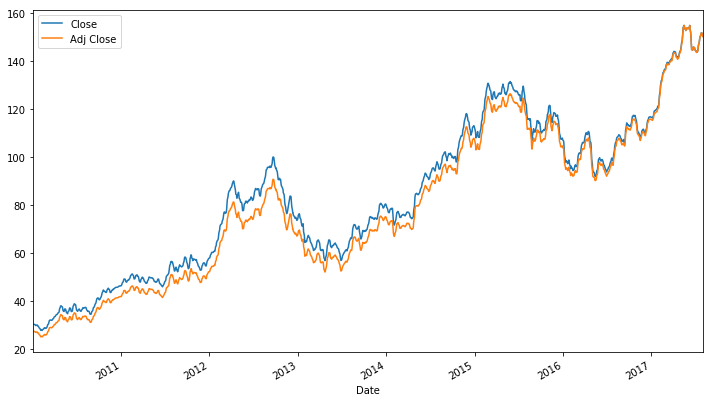

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

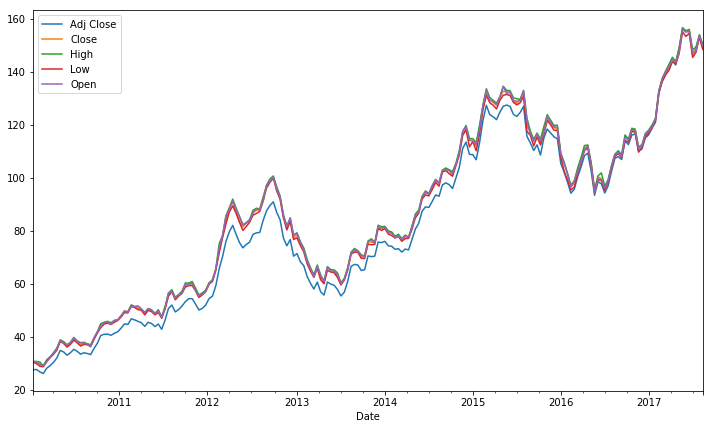

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

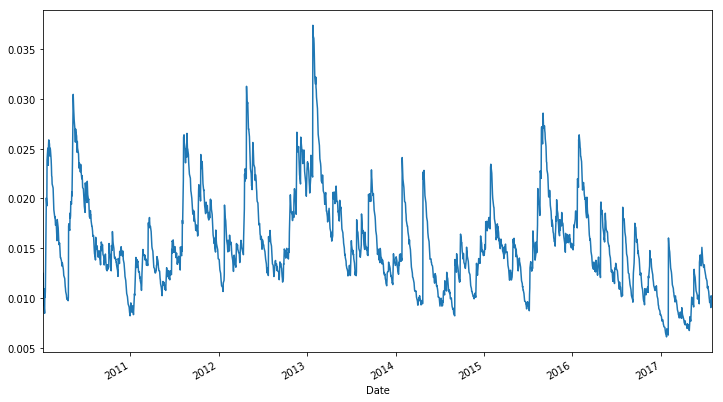

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data (Lab2.6 al final)

In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

/content/../demos/avocados.py:55: FutureWarning: The default value of regex will change from True to False in a future version.
  frame['Region'] = frame['Region'].str.replace(' U.S.', '')


,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

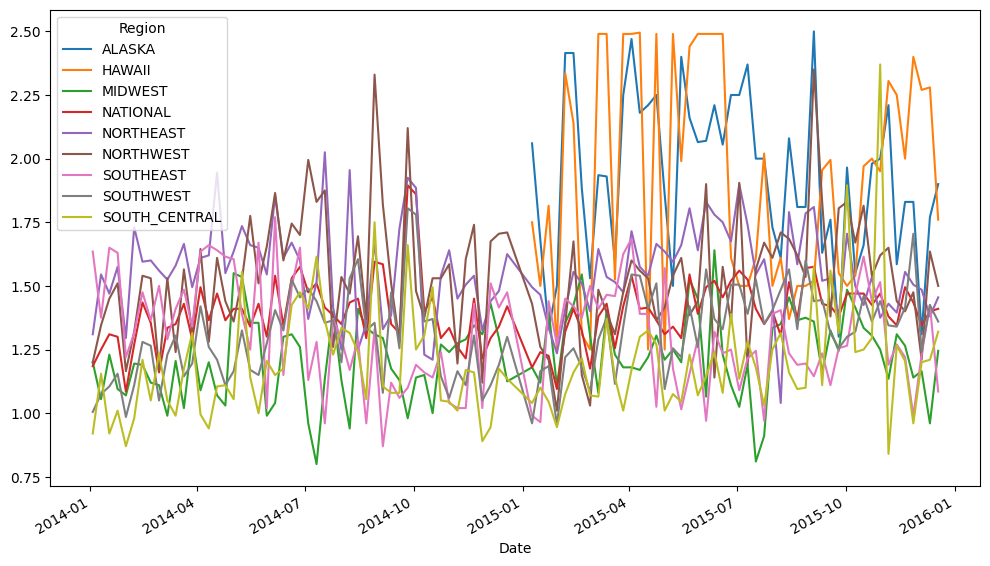

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

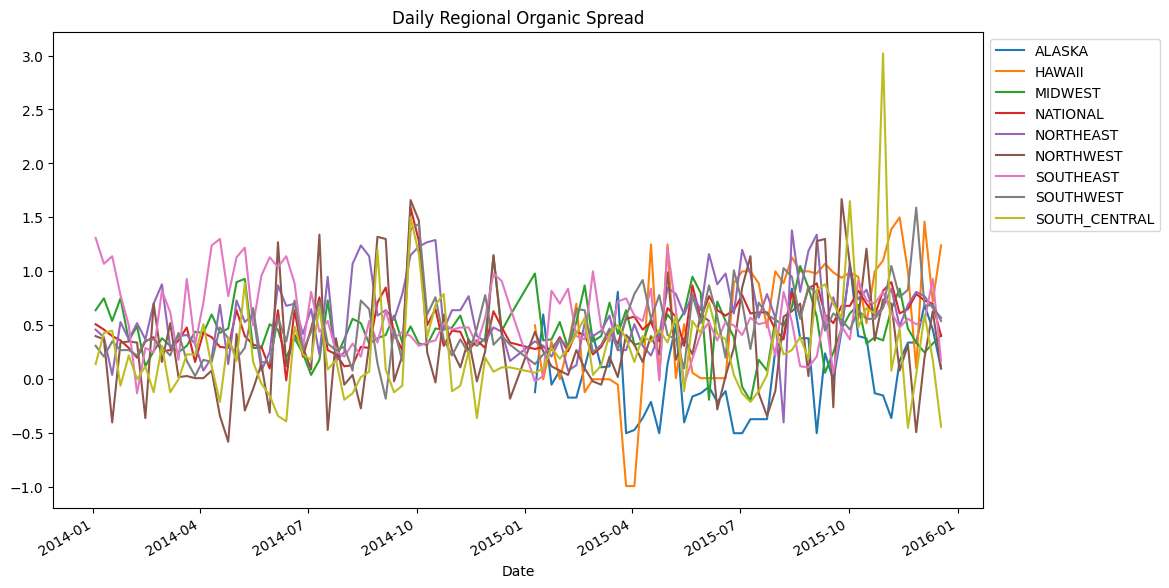

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


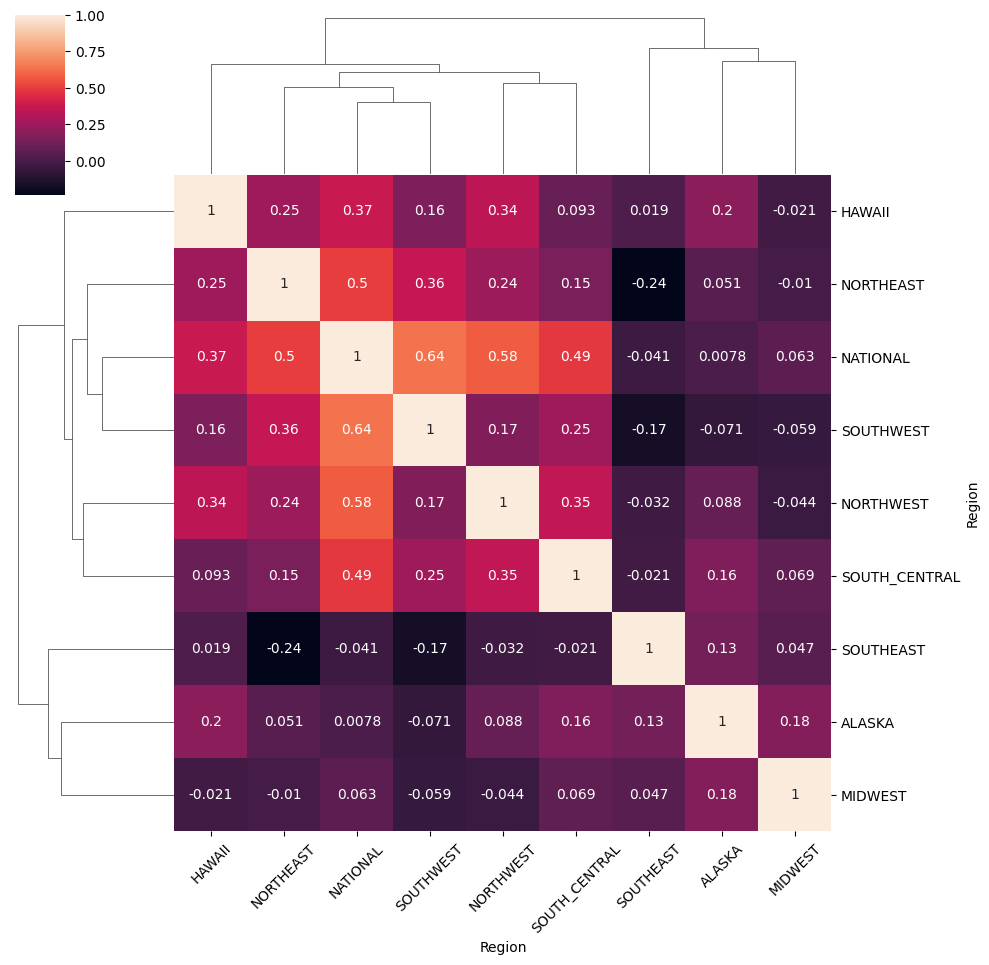

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

## Análisis Lab 2.6

### **Tipos de Siembras Palmira 2020-2021**

*   Fuente: https://www.datos.gov.co/Agricultura-y-Desarrollo-Rural/

In [7]:
#importaciones
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd
from sodapy import Socrata

#llamada de los datos
client = Socrata("www.datos.gov.co", None)

results = client.get("dwff-8dr8", limit=150)

#Arreglo y muestra de los datos:
especies_plantadas = []
cantidad_arboles = []
for i in results:
  arbol = i['especie_plantada']
  cantidad = int(i['cantidad_arboles'])
  especies_plantadas.append(arbol)
  cantidad_arboles.append(cantidad)



####Diagrama de barras de la cantidad de árboles

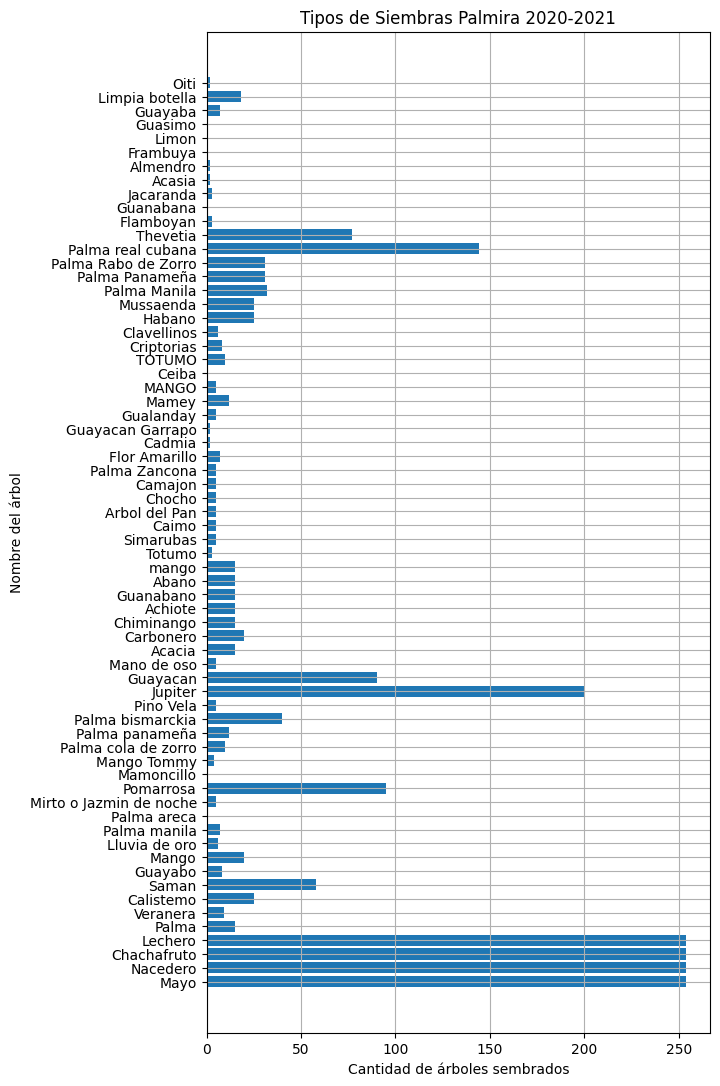

In [8]:
import matplotlib.pyplot as plt

y = especies_plantadas
x = cantidad_arboles

plt.figure(figsize=(6.5,13))
plt.barh(y, x)

# setting label of y-axis
plt.ylabel("Nombre del árbol")

# setting label of x-axis
plt.xlabel("Cantidad de árboles sembrados")
plt.title("Tipos de Siembras Palmira 2020-2021")
plt.grid()


plt.show()

####Diagrama de pastel para la cantidad de árboles

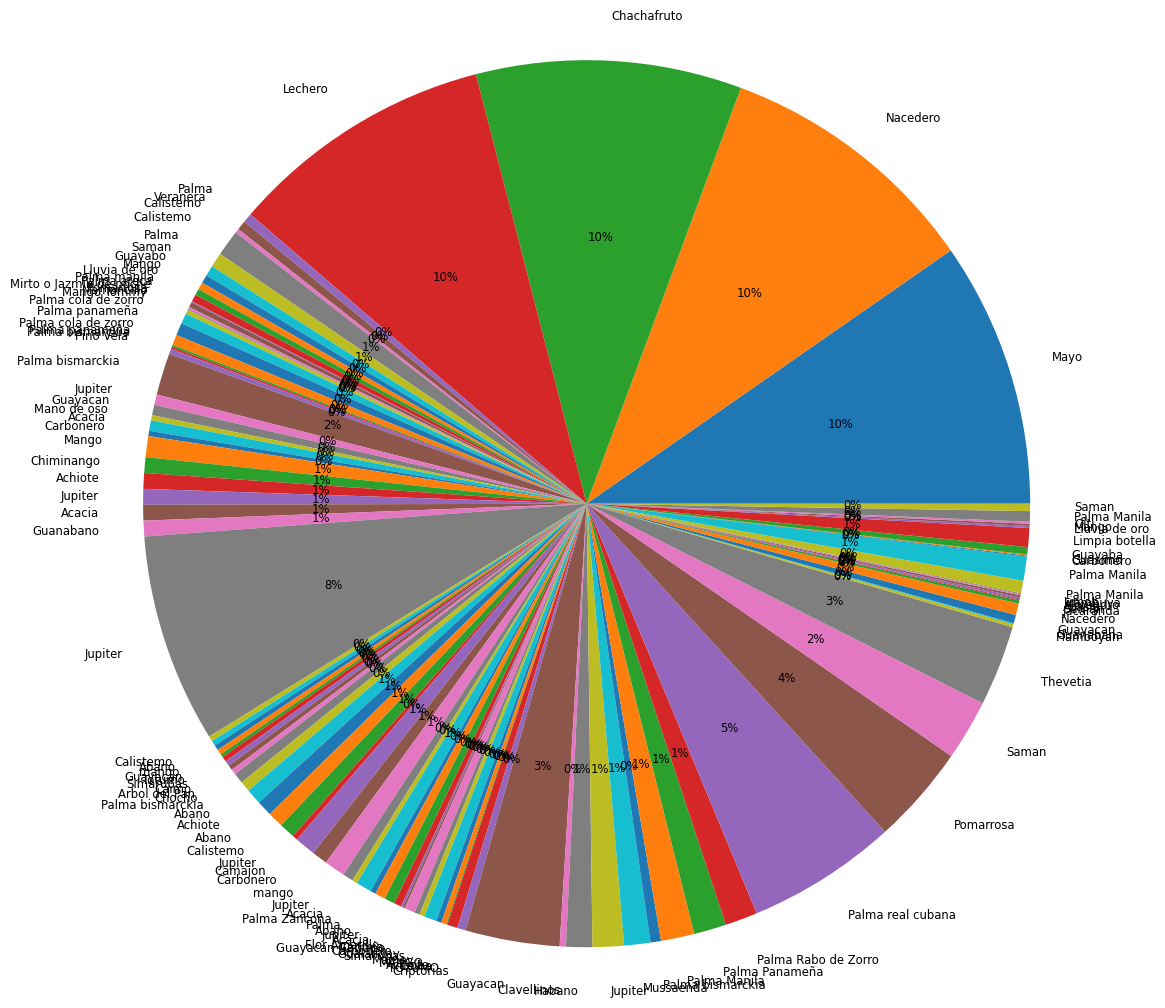

In [9]:
import matplotlib.pyplot as plt
labels = y
sizes = x

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct='%.0f%%',
       textprops={'size': 'smaller'}, radius=3)
plt.show()

####Histograma para la cantidad de árboles sembrados

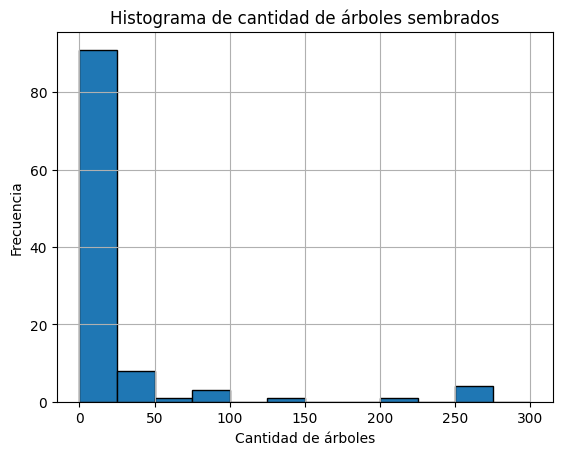

In [10]:
import matplotlib.pyplot as plt


datos = x


bins = [0,25,50,75,100,125,150,175,200,225,250,275,300]


plt.hist(datos, bins=bins, edgecolor='black')


plt.xlabel('Cantidad de árboles')
plt.ylabel('Frecuencia')
plt.title('Histograma de cantidad de árboles sembrados')
plt.grid(True)


plt.show()


Por las anteriores graficas podemos observar que en la region de Palmira la siembra de arboles se basa principalmente en los arboles de: Lechero, Chachafruto, Nacedero y Mayo puesto que al año se siembran aproximadamente 250 arboles de cada una de estas especies de arboles.